( 0): 0.6541    ( 1): 0.3854    ( 2): 0.1506    
( 0): 76.7628   ( 1): 86.1018   ( 2): 94.5696   
( 0): 0.7556    ( 1): 0.6654    ( 2): 0.5799    
( 0): 74.0450   ( 1): 79.1400   ( 2): 83.6510   


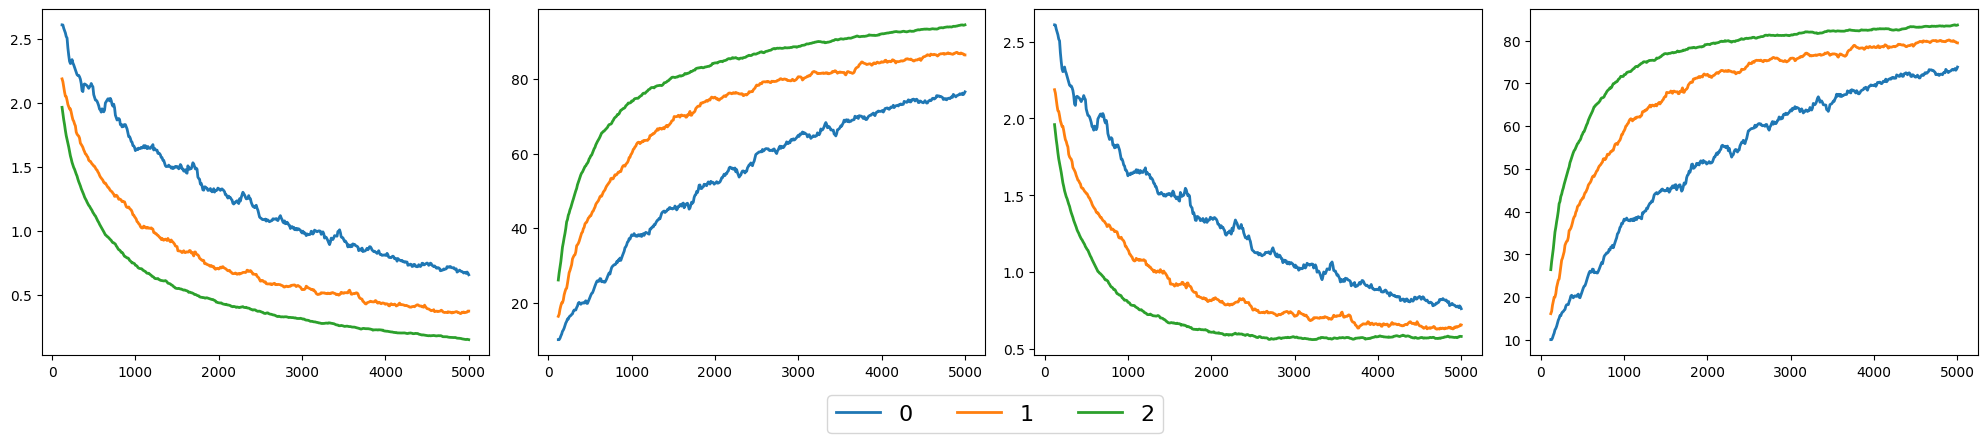

In [14]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sys 
sys.path.append('/home/moon/data/exps/sequential_local_sgd/')

from sim.utils.record_utils import read_fromcsv
from plots.plot_utils import moving_average, save_fig_timestamp


def plot_curve(ax, files, setup, path):
    ylabels = ['Round', 'Training Loss', 'Training Top1 Accuracy (%)', 'Training Top5 Accuracy (%)', 'Test Loss', 'Test Top1 Accuracy (%)', 'Test Top5 Accuracy (%)']
    y_keys = ['round', 'train_loss', 'train_top1', 'train_top5', 'test_loss', 'test_top1', 'test_top5', ]

    yi = setup['yi']

    for i in range(len(files)):
        files[i] = f'{files[i]}.csv' if '.csv' not in files[i] else files[i]
        if os.path.exists(os.path.join(path, files[i])):
            df = read_fromcsv(files[i], path)
            
            out = df.iloc[:, yi].values[-setup['select']:]
            print('({:>2}):'.format(i), end=' ')
            #print('{:<5.2f}+{:<5.2f}'.format(out[j].mean(axis=0), out[j].std(axis=0)), end=' ')
            print('{:<9.4f}'.format(out.mean(axis=0)), end=' ')

            x = df['round'].values
            y = df[y_keys[yi]].values
            if setup['smooth'] == 1:
                window_size = int(0.01*max(x)*0.25)
                y_smooth = moving_average(y, window_size)
                x_smooth = x[len(x)-len(y_smooth):]
                x, y = x_smooth, y_smooth
            ax.plot(x, y, color=None, lw=2, linestyle='-', marker='', label=i)            

            # customize
            #ax.set_xlim(xmax=5000)
        else:
            print('Not found {}'.format(files[i]))
    print()
    #ax.legend()
    #plt.title(get_title(files[i]), fontsize=24)
    #plt.xlim(xmin=0, xmax=setup['end'])
    #plt.ylim(ymin=0.000001)
    #plt.xticks(fontsize=12)
    #plt.yticks(fontsize=12)
    #plt.ylabel(ylabel, fontsize=20)
    #plt.legend(loc=4, ncol=1, fontsize=15, bbox_to_anchor=(2, 0))
    #plt.legend(loc=4, ncol=1, fontsize=16)
    #plt.grid()
    #plt.yscale('log')
    #split_filename = files[0].split('_')
    

    #filename = 'clip_{}_{}_{}_{}_{}'.format(split_filename[0], split_filename[3], split_filename[5], split_filename[6], split_filename[7])
    #print(filename)
    #plt.savefig('../figs/{}.pdf'.format(filename), bbox_inches='tight', dpi=300)
    
    #plt.show()

def get_title(filename):
    if '.csv' in filename:
        filename = filename[:-4]
    split_t = filename.split('_')
    if split_t[0] == 'CWT':
        alg_name = 'SFL'
    elif split_t[0] == 'FedAvg':
        alg_name = 'PFL'
    else:
        alg_name = split_t[0]
    part2 = '$C$={}'.format(re.sub(r'exdir', '', split_t[7])[0])
    part3 = '$K$={}'.format(re.sub(r'K', '', split_t[3]))
    return '{}, {}, {}'.format(alg_name, part2, part3)

def get_legend(filename):
    if '.csv' in filename:
        filename = filename[:-4]
    split_t = filename.split('_')
    if re.sub(r'clip', '', split_t[-1]) != '0':
        clip = 'w/ clip={}'.format(re.sub(r'clip', '', split_t[-1]))
    else:
        clip = 'w/o clip'
    sgd = re.sub(r'sgd', '', split_t[8])
    sgd = sgd.split(',')
    lr = sgd[0]
    if split_t[0] == 'CWT':
        alg_name = 'SFL'
    elif split_t[0] == 'FedAvg':
        alg_name = 'PFL'
    else:
        alg_name = split_t[0]
    label = "{}, lr={}".format(alg_name,lr)
    return label



def main():
    path = f'/home/moon/data/exps/sequential_local_sgd/save/'
    files = [
        'cifar10/FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir1,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10.csv',
        'cifar10/FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir2,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10.csv',
        'cifar10/FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir5,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10.csv',
    ]

    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    for i in range(4):
        plot_curve(axs[i], files=files, setup={'end': 20000, 'select': 10, 'smooth': 1, 'yi': [1,2,4,5][i]}, path=path)
    fig.tight_layout()
    fig.legend(labels=[i for i in range(len(files))], loc='center', ncols=len(files), bbox_to_anchor=(0.5, -0.05), fontsize=16)
    #save_fig_timestamp(fig)
    
if __name__ == '__main__':
    main()